In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаю данные по раку молочной железы из 28-го релиза с ICGC Data Portal (https://dcc.icgc.org/releases/release_28/Projects/). На сегодня это последний релиз. Авторы исходной статьи работали с 25-м - последним на тот момент

In [177]:
breast1 = pd.read_csv('structural_somatic_mutation.BRCA-EU.tsv', sep="\t")
breast2 = pd.read_csv('structural_somatic_mutation.BRCA-FR.tsv', sep="\t")
breast3 = pd.read_csv('structural_somatic_mutation.BRCA-UK.tsv', sep="\t")

Есть три датасета с данными по разным странам. Объединяю их в один

In [178]:
data = pd.concat([breast1, breast2, breast3])

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98853 entries, 0 to 2443
Data columns (total 47 columns):
icgc_donor_id                       98853 non-null object
project_code                        98853 non-null object
icgc_specimen_id                    98853 non-null object
icgc_sample_id                      98853 non-null object
submitted_sample_id                 98853 non-null object
submitted_matched_sample_id         98853 non-null object
variant_type                        98853 non-null object
sv_id                               98853 non-null object
placement                           98853 non-null int64
annotation                          98853 non-null object
interpreted_annotation              2397 non-null object
chr_from                            98853 non-null object
chr_from_bkpt                       98853 non-null int64
chr_from_strand                     98853 non-null int64
chr_from_range                      98853 non-null int64
chr_from_flanking_seq      

Видим, что есть пустые столбцы и столбцы с пропущенными занчениями. К счастью, судя по предыдущей статье, нам нужны не все колонки. Оставляю столбцы с информацией о положении точек разрыва (как это делали авторы исходной статьи) и типе мутации (из них сделаю собственную фичу).

In [180]:
data = data[["icgc_donor_id","icgc_sample_id","variant_type",
                                   "chr_from","chr_from_bkpt","chr_from_range",
                                   "chr_to","chr_to_bkpt","chr_to_range"]]

In [181]:
data.head(5).T

,0,1,2,3,4
icgc_donor_id,DO218489,DO218489,DO218489,DO218489,DO218489
icgc_sample_id,SA543682,SA543682,SA543682,SA543682,SA543682
variant_type,inversion,interchromosomal rearrangement - unknown type,interchromosomal rearrangement - unknown type,deletion,interchromosomal rearrangement - unknown type
chr_from,4,2,1,11,5
chr_from_bkpt,23515432,218050683,11079869,133629244,50335457
chr_from_range,5,2,2,4,1
chr_to,4,19,19,11,7
chr_to_bkpt,28683584,31856544,39037104,133643403,57986059
chr_to_range,5,2,2,4,1


Посмотрим, какие типы мутаций встречаются и с какой частотой они это делают

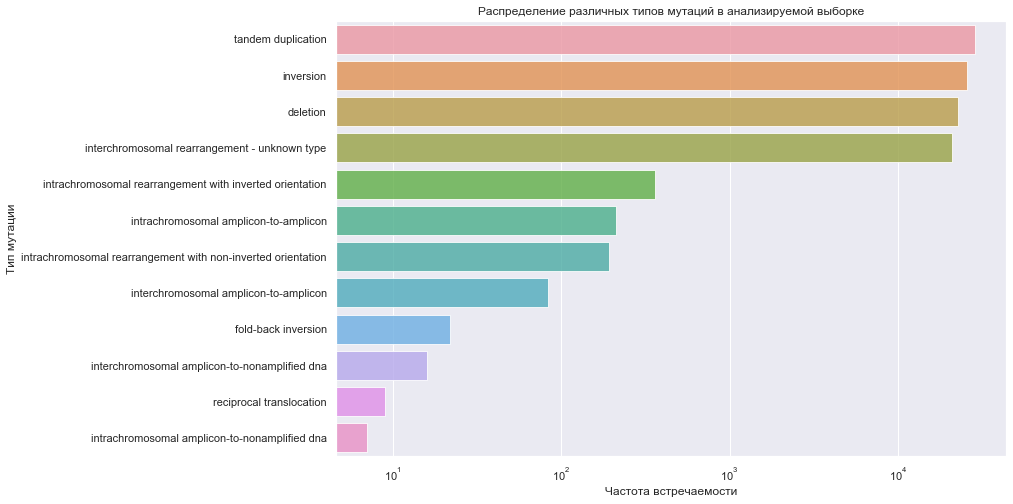

In [182]:
var  = data['variant_type'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(var.values, var.index, alpha=0.8, log=True)
plt.title('Распределение различных типов мутаций в анализируемой выборке')
plt.xlabel('Частота встречаемости', fontsize=12)
plt.ylabel('Тип мутации', fontsize=12)
plt.show()

У нас есть также данные по донорам. По ним можно посмотреть, например, распределение больных по полу и возрасту.

In [76]:
donor1 = pd.read_csv('donor.BRCA-EU.tsv', sep='\t')
donor2 = pd.read_csv('donor.BRCA-FR.tsv', sep='\t')
donor3 = pd.read_csv('donor.BRCA-UK.tsv', sep='\t')
donor = pd.concat([donor1, donor2, donor3])
donor = donor[['donor_sex', 'donor_age_at_diagnosis']]
donor = donor.rename({'donor_sex': 'sex', 'donor_age_at_diagnosis': 'age'}, axis=1)
donor.head()

,sex,age
0,female,45.0
1,female,48.0
2,female,55.0
3,female,64.0
4,female,84.0


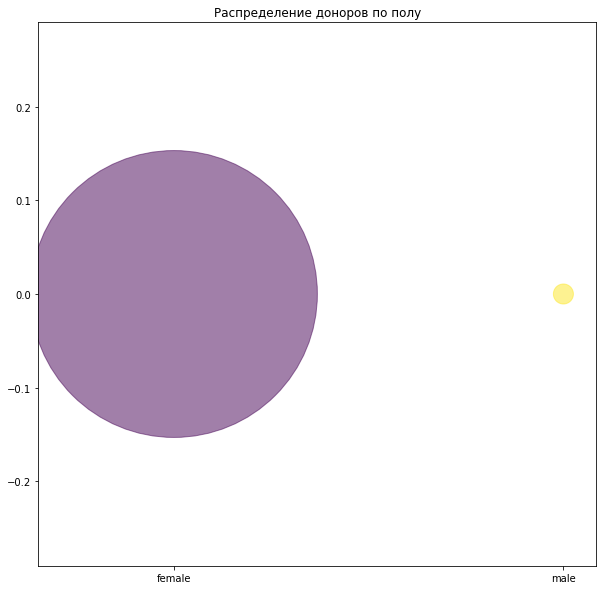

In [9]:
plt.figure(figsize=(10, 10))
x = donor['sex'].unique()
y = donor['sex'].value_counts()*100
N = 2
colors = np.random.rand(N)
plt.scatter(x, (0,0), s=y, c=colors, alpha=0.5)
plt.title('Распределение доноров по полу')
plt.show()

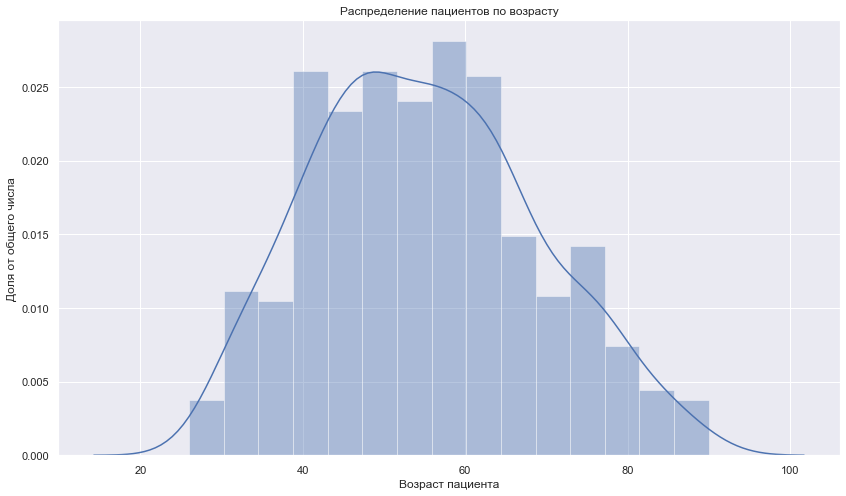

In [183]:
sns.set()
plt.figure(figsize=(14, 8))
sns.distplot(donor.age.dropna())

plt.title('Распределение пациентов по возрасту')
plt.xlabel('Возраст пациента', fontsize=12)
plt.ylabel('Доля от общего числа', fontsize=12)
plt.show()

Как и ожидалось, женщин гораздо больше, чем мужчин, а пик заболеваемости приходится на 40-65 лет.

Сохраню на всякий случай данные, чтобы в случае чего не приходилось перезапускать весь код

In [184]:
data.to_csv('breakpoints1.csv', index=False)

In [185]:
data = pd.read_csv('breakpoints1.csv')
data.head().T

,0,1,2,3,4
icgc_donor_id,DO218489,DO218489,DO218489,DO218489,DO218489
icgc_sample_id,SA543682,SA543682,SA543682,SA543682,SA543682
variant_type,inversion,interchromosomal rearrangement - unknown type,interchromosomal rearrangement - unknown type,deletion,interchromosomal rearrangement - unknown type
chr_from,4,2,1,11,5
chr_from_bkpt,23515432,218050683,11079869,133629244,50335457
chr_from_range,5,2,2,4,1
chr_to,4,19,19,11,7
chr_to_bkpt,28683584,31856544,39037104,133643403,57986059
chr_to_range,5,2,2,4,1


Разделяю данные как в статье, чтобы с ними проще было работать.
«chr_from_range» и «chr_to_range» демонстрируют радиус в парах оснований вокруг местоположения точки разрыва, указанного в столбцах «chr_from_bkpt» и «chr_to_bkpt», которые действительно могут содержать настоящую точку разрыва.

In [186]:
# chr_from_bkpt  - старт
# chr_from_range - +- пар оснований 
data_obj = data[['chr_from', 'chr_to']]
data_int = data[['chr_from_bkpt', 'chr_from_range', 'chr_to_bkpt', 'chr_to_range']]
data_int

,chr_from_bkpt,chr_from_range,chr_to_bkpt,chr_to_range
0,23515432,5,28683584,5
1,218050683,2,31856544,2
2,11079869,2,39037104,2
3,133629244,4,133643403,4
4,50335457,1,57986059,1
5,34258498,0,3415865,0
6,6102685,2,61948952,2
7,111166781,1,50196520,1
8,13256939,0,13260353,0
9,75144886,6,104591728,6


Для дальнейших расчетов обрабатываю данные так же, как это делали авторы исходной статьи

In [187]:
# data.rename(columns={'исходное': 'новое название'}) - эта команда заменит весь код в блоке

from_data = data[["icgc_donor_id", "icgc_sample_id", "variant_type", "chr_from", "chr_from_bkpt", "chr_from_range"]].copy()
from_data['chr_bkpt'] = from_data['chr_from_bkpt']
del from_data['chr_from_bkpt']
from_data['chr'] = from_data['chr_from']
del from_data['chr_from']
from_data['chr_range'] = from_data['chr_from_range']
del from_data['chr_from_range']


to_data = data[["icgc_donor_id", "icgc_sample_id", "variant_type", "chr_to", "chr_to_bkpt", "chr_to_range"]].copy()
to_data['chr_bkpt'] = to_data['chr_to_bkpt']
del to_data['chr_to_bkpt']
to_data['chr'] = to_data['chr_to']
del to_data['chr_to']
to_data['chr_range'] = to_data['chr_to_range']
del to_data['chr_to_range']

data = pd.concat([from_data, to_data])

In [188]:
data.head()

,icgc_donor_id,icgc_sample_id,variant_type,chr_bkpt,chr,chr_range
0,DO218489,SA543682,inversion,23515432,4,5
1,DO218489,SA543682,interchromosomal rearrangement - unknown type,218050683,2,2
2,DO218489,SA543682,interchromosomal rearrangement - unknown type,11079869,1,2
3,DO218489,SA543682,deletion,133629244,11,4
4,DO218489,SA543682,interchromosomal rearrangement - unknown type,50335457,5,1


Значения типа мутации `variant_type` превратим в dummy-столбцы, так как они могут понадобится для построения моделей

In [189]:
data.variant_type.value_counts()

tandem duplication                                              57494
inversion                                                       51090
deletion                                                        45598
interchromosomal rearrangement - unknown type                   41724
intrachromosomal rearrangement with inverted orientation          720
intrachromosomal amplicon-to-amplicon                             424
intrachromosomal rearrangement with non-inverted orientation      382
interchromosomal amplicon-to-amplicon                             166
fold-back inversion                                                44
interchromosomal amplicon-to-nonamplified dna                      32
reciprocal translocation                                           18
intrachromosomal amplicon-to-nonamplified dna                      14
Name: variant_type, dtype: int64

In [190]:
data = pd.get_dummies(data, 'vt', columns=['variant_type'], drop_first=False)
data.head().T

,0,1,2,3,4
icgc_donor_id,DO218489,DO218489,DO218489,DO218489,DO218489
icgc_sample_id,SA543682,SA543682,SA543682,SA543682,SA543682
chr_bkpt,23515432,218050683,11079869,133629244,50335457
chr,4,2,1,11,5
chr_range,5,2,2,4,1
vt_deletion,0,0,0,1,0
vt_fold-back inversion,0,0,0,0,0
vt_interchromosomal amplicon-to-amplicon,0,0,0,0,0
vt_interchromosomal amplicon-to-nonamplified dna,0,0,0,0,0
vt_interchromosomal rearrangement - unknown type,0,1,1,0,1


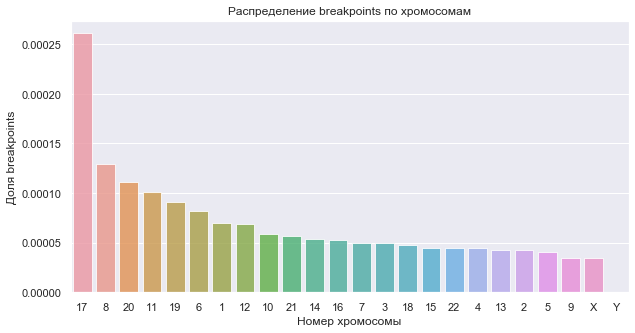

In [191]:
chr_base = pd.DataFrame({'len':(249250621,243199373,198022430,191154276,
                   180915260,171115067,159138663,146364022,
                   141213431,135534747,135006516,133851895,
                   115169878,107349540,102531392,90354753,
                   81195210,78077248,59128983,63025520,
                   48129895,51304566,155270560,59373566),
                 'name': ([str(x) for x in range(1,23)] + ["X","Y"])})
new_data = pd.DataFrame(data['chr'].value_counts())
new_data['name'] = new_data.index
new_data = new_data.merge(chr_base, how='inner', on='name')
new_data['norm'] = new_data['chr'] / new_data['len']
new_data = new_data.sort_values('norm', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(new_data['name'], new_data['norm'], alpha=0.8)
plt.title('Распределение breakpoints по хромосомам')
plt.ylabel('Доля breakpoints', fontsize=12)
plt.xlabel('Номер хромосомы', fontsize=12)
plt.show()

В хромосоме Y очень мало точек разрыва, а в хромосоме MT они не встретились, поэтому исключим их. И MT на всякий случай тоже, вдруг она появится в следующем релизе

In [192]:
data = data[data.chr != "MT"]
data = data[data.chr != "Y"]

Диапазон положения точки разрыва с учетом погрешности (опять же, взято у авторов исходной статьи)

In [193]:
data['chr_bkpt_beg'] = data['chr_bkpt'] - data['chr_range']
data['chr_bkpt_end'] = data['chr_bkpt'] + data['chr_range']

### Функция генерации таблицы окон в хромосомах в зависимости от размера окна
Геном, представленный в образцах, был разделен на непересекающиеся окна различной длины (10 кб, 100 кб, 1 мб и т.д.). Для каждого окна была рассчитана плотность точек разрыва как число точек разрыва, расположенное в окне, деленное на общее количество точек разрыва в геноме.

In [194]:
def get_chr_windows(wind=1000000):
    print('Window size:', wind)
    # number of bases in chromosomes
    # удалить, т.к. придет аргументом
    chr_base = pd.DataFrame({'len':(249250621,243199373,198022430,191154276,
                   180915260,171115067,159138663,146364022,
                   141213431,135534747,135006516,133851895,
                   115169878,107349540,102531392,90354753,
                   81195210,78077248,59128983,63025520,
                   48129895,51304566,155270560),
                 'name': ([str(x) for x in range(1,23)] + ["X"])})

    chr_windows = pd.DataFrame({'chr': [],'from': [], 'to': []})
    
    # for each chromosome
    for i in range(chr_base.shape[0]):
        name = chr_base.loc[i,'name']
        length = chr_base.loc[i,'len']
        
        # generate windows boundaries including right border
        a = list(range(0, length, wind))
        #print(a)
    
        if length > a[-1]:        
            a.append(length)
    
    
        a_from = a[:-1]
        a_to = a[1:]
        
        chr_windows = chr_windows.append(pd.DataFrame({'chr': [name]*len(a_from),'from': a_from, 'to': a_to})) 
        
    
    chr_windows['from'] = chr_windows['from'].astype(int)
    chr_windows['to'] = chr_windows['to'].astype(int)
    return chr_windows

### Функция подсчета количества точек разрыва в окнах

In [195]:
def bkpt(all_data, chr_windows, window_size=10000):
  
    all_data['window_0'] = np.ceil(all_data.chr_bkpt_beg / window_size).astype(int)
    all_data['window_1'] = np.ceil(all_data.chr_bkpt_end / window_size).astype(int)
    all_data['dif_wind'] = all_data.window_1 - all_data.window_0
  
  
    a = pd.DataFrame(all_data.groupby(['chr','window_0']) \
                     .count().iloc[:,0]) \
                     .reset_index() \
                     .rename({'icgc_donor_id':'count_bkpt', 'window_0': 'window'}, axis=1)
  
    b = pd.DataFrame(all_data[data.dif_wind > 0] \
                    .groupby(['chr','window_1']) \
                    .count().iloc[:,0]) \
                    .reset_index() \
                    .rename({'icgc_donor_id':'count_bkpt', 'window_1': 'window'}, axis=1) \
                    .astype({'chr': str, 'window': int})
    
    c = pd.DataFrame(all_data.groupby(['chr','window_0']) \
                     .sum().iloc[:,0:12]) \
                     .reset_index() \
                     .rename({'window_0': 'window'}, axis=1)
  
    quantity = a.append(b)
    quantity['count_bkpt'] = quantity.groupby(['chr','window'], as_index=False)['count_bkpt'].sum()['count_bkpt']
  

    agg_quantity = quantity.groupby('chr', as_index=False)['count_bkpt'].sum()
  
    chr1 = chr_windows.chr.unique()
    chr_windows['window'] = 0
    
    for i in range(len(chr1)):
        chr_windows.loc[chr_windows.chr==chr1[i],'window'] = list(range(1, sum(chr_windows.chr==chr1[i])+1))
    
  
    chr_windows = chr_windows.merge(agg_quantity, how='left', on='chr') \
                    .rename({'count_bkpt': 'bkpt_in_chr'}, axis=1)
    
    chr_windows = chr_windows.merge(quantity, how='left', on=['chr', 'window']) \
                    .rename({'count_bkpt': 'bkpt_in_window'}, axis=1) \
                    .fillna(0) \
                    .astype({'bkpt_in_window': int})
    
    chr_windows = chr_windows.merge(c, how='left', on=['chr', 'window']).fillna(0)
    
        
    chr_windows['density'] = chr_windows.bkpt_in_window / chr_windows.bkpt_in_chr
    
    return chr_windows

Аннотация генома человека с помощью квадруплексов была сделана авторами статьи с использованием регулярного выражения. Это марковская модель, основанная на серии отдельных окон, позволяющие учесть неоднородность ДНК. В своей работе я воспользовалась готовыми данными, полученными авторами статьи.
Покрытие было использовано в качестве меры измерения плотности для неканонических структур в данном окне. Покрытие квадруплексами было рассчитано как общая длина всех структур в окне, деленная на размер окна.

In [196]:
window_sizes = {'10kb': 10000, '20kb': 20000, '50kb': 50000 , \
                '100kb': 100000, '500kb': 500000, '1mb': 1000000}

data_sizes = dict() 

for name, size in window_sizes.items():
    chr_windows = get_chr_windows(size)
    df = bkpt(data, chr_windows, size)
    
    total_bkpt = sum(df.bkpt_in_window)
    df['density_breast'] = df.bkpt_in_window / total_bkpt
    
    quadr = pd.read_csv('quadr_cov_{}.csv'.format(name), low_memory=False) \
       .astype({'chr': str, 'from': int})
    quadr['coverage_q_1'] = (quadr['coverage_q']>quadr['coverage_q'].quantile(0.99)).astype(int)
    quadr['coverage_q_0.5'] = (quadr['coverage_q']>quadr['coverage_q'].quantile(0.995)).astype(int)
    quadr['coverage_q_0.1'] = (quadr['coverage_q']>quadr['coverage_q'].quantile(0.999)).astype(int)
    quadr['coverage_q_0.05'] = (quadr['coverage_q']>quadr['coverage_q'].quantile(0.9995)).astype(int)
    quadr['coverage_q_0.01'] = (quadr['coverage_q']>quadr['coverage_q'].quantile(0.9999)).astype(int)
    
    
    
    df = pd.merge(df, quadr, on=['chr', 'from'])
    
    df.chr = df.chr.apply(lambda c: int(c) if (c != 'X' and c != 'Y') else 22 if c == 'X' else 23)
    
    data_sizes[name] = df.drop(['from', 'chr_range'], axis=1) \
            .astype(dict(zip([c for c in df.columns if c.startswith('vt_')], [int]*12)))

Window size: 10000
Window size: 20000
Window size: 50000
Window size: 100000
Window size: 500000
Window size: 1000000


In [197]:
for name, size in window_sizes.items():
    data_sizes[name].to_csv('breakpoints2_{}.csv'.format(name), index=False)

Формирую наш таргет - хотспоты

In [198]:
data_10 = pd.read_csv('breakpoints2_10kb.csv')
data_20 = pd.read_csv('breakpoints2_20kb.csv')
data_50 = pd.read_csv('breakpoints2_50kb.csv')
data_100 = pd.read_csv('breakpoints2_100kb.csv')
data_500 = pd.read_csv('breakpoints2_500kb.csv')
data_1000 = pd.read_csv('breakpoints2_1mb.csv')

Буду искать это

In [199]:
data_10['breast_bkpt_hotspot_1'] = (data_10['density']>data_10['density'].quantile(0.99)).astype(int)
data_20['breast_bkpt_hotspot_1'] = (data_20['density']>data_20['density'].quantile(0.99)).astype(int)
data_50['breast_bkpt_hotspot_1'] = (data_50['density']>data_50['density'].quantile(0.99)).astype(int)
data_100['breast_bkpt_hotspot_1'] = (data_100['density']>data_100['density'].quantile(0.99)).astype(int)
data_500['breast_bkpt_hotspot_1'] = (data_500['density']>data_500['density'].quantile(0.99)).astype(int)
data_1000['breast_bkpt_hotspot_1'] = (data_1000['density']>data_1000['density'].quantile(0.99)).astype(int)

Поскольку размер окна не имеет для нас большого значения, я буду работать с data_1000, так как в нем минорный класс представлен немного чаще, чем в файлах с меньшим размером окна

In [200]:
data_1000.head(5).T

,0,1,2,3,4
chr,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
to_x,1.000000e+06,2.000000e+06,3.000000e+06,4.000000e+06,5.000000e+06
window,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
bkpt_in_chr,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04
bkpt_in_window,3.100000e+01,8.700000e+01,3.600000e+01,2.700000e+01,4.300000e+01
chr_bkpt,2.264031e+07,1.225283e+08,8.510608e+07,9.227242e+07,1.893477e+08
vt_deletion,7.000000e+00,1.600000e+01,8.000000e+00,1.600000e+01,1.500000e+01
vt_fold-back inversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vt_interchromosomal amplicon-to-amplicon,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vt_interchromosomal amplicon-to-nonamplified dna,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [201]:
#Поскольку SMOTE может увеличить количество примеров в минорном классе до мажорного, а я опасаюсь, что это приведет
#к переобучению, я создаю датасет, в котором будут все представители минорного класса и некоторые - мажорного, чтобы 
#сделать на нем оверсемплинг

data_minor = data_1000[data_1000['breast_bkpt_hotspot_1']>0]
data_minor.head(10).T

,1726,1730,1892,1893,1894,2416,2417,2549,2550,2683
chr,1.000000e+01,1.000000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.500000e+01,1.500000e+01,1.700000e+01,1.700000e+01,1.900000e+01
to_x,3.900000e+07,4.300000e+07,6.900000e+07,7.000000e+07,7.100000e+07,9.900000e+07,1.000000e+08,3.800000e+07,3.900000e+07,1.100000e+07
window,3.900000e+01,4.300000e+01,6.900000e+01,7.000000e+01,7.100000e+01,9.900000e+01,1.000000e+02,3.800000e+01,3.900000e+01,1.100000e+01
bkpt_in_chr,7.943000e+03,7.943000e+03,1.358600e+04,1.358600e+04,1.358600e+04,4.616000e+03,4.616000e+03,2.118000e+04,2.118000e+04,5.404000e+03
bkpt_in_window,2.690000e+02,2.850000e+02,5.360000e+02,6.850000e+02,6.130000e+02,1.670000e+02,1.640000e+02,1.488000e+03,1.014000e+03,1.940000e+02
chr_bkpt,1.042649e+10,1.211829e+10,3.676614e+10,4.760467e+10,4.318368e+10,1.645260e+10,1.631816e+10,5.596832e+10,3.894709e+10,2.043594e+09
vt_deletion,2.240000e+02,1.800000e+02,1.040000e+02,1.340000e+02,1.180000e+02,2.500000e+01,2.200000e+01,3.460000e+02,2.250000e+02,2.700000e+01
vt_fold-back inversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,0.000000e+00
vt_interchromosomal amplicon-to-amplicon,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
vt_interchromosomal amplicon-to-nonamplified dna,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00


In [202]:
data_minor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1726 to 2892
Data columns (total 29 columns):
chr                                                                31 non-null int64
to_x                                                               31 non-null int64
window                                                             31 non-null int64
bkpt_in_chr                                                        31 non-null int64
bkpt_in_window                                                     31 non-null int64
chr_bkpt                                                           31 non-null float64
vt_deletion                                                        31 non-null int64
vt_fold-back inversion                                             31 non-null int64
vt_interchromosomal amplicon-to-amplicon                           31 non-null int64
vt_interchromosomal amplicon-to-nonamplified dna                   31 non-null int64
vt_interchromosomal rearrangement - unkn

In [203]:
data_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 29 columns):
chr                                                                3054 non-null int64
to_x                                                               3054 non-null int64
window                                                             3054 non-null int64
bkpt_in_chr                                                        3054 non-null int64
bkpt_in_window                                                     3054 non-null int64
chr_bkpt                                                           3054 non-null float64
vt_deletion                                                        3054 non-null int64
vt_fold-back inversion                                             3054 non-null int64
vt_interchromosomal amplicon-to-amplicon                           3054 non-null int64
vt_interchromosomal amplicon-to-nonamplified dna                   3054 non-null int64
vt_interchromosomal r

In [204]:
data_major = data_1000[data_1000['breast_bkpt_hotspot_1']<1]
data_major.head(10).T

,0,1,2,3,4,5,6,7,8,9
chr,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
to_x,1.000000e+06,2.000000e+06,3.000000e+06,4.000000e+06,5.000000e+06,6.000000e+06,7.000000e+06,8.000000e+06,9.000000e+06,1.000000e+07
window,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01
bkpt_in_chr,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04,1.751400e+04
bkpt_in_window,3.100000e+01,8.700000e+01,3.600000e+01,2.700000e+01,4.300000e+01,3.700000e+01,5.000000e+01,2.000000e+01,7.200000e+01,7.000000e+01
chr_bkpt,2.264031e+07,1.225283e+08,8.510608e+07,9.227242e+07,1.893477e+08,2.041888e+08,3.229498e+08,1.522005e+08,6.107031e+08,6.658287e+08
vt_deletion,7.000000e+00,1.600000e+01,8.000000e+00,1.600000e+01,1.500000e+01,1.000000e+01,1.700000e+01,5.000000e+00,1.400000e+01,1.000000e+01
vt_fold-back inversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vt_interchromosomal amplicon-to-amplicon,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vt_interchromosomal amplicon-to-nonamplified dna,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [205]:
data_major.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3023 entries, 0 to 3053
Data columns (total 29 columns):
chr                                                                3023 non-null int64
to_x                                                               3023 non-null int64
window                                                             3023 non-null int64
bkpt_in_chr                                                        3023 non-null int64
bkpt_in_window                                                     3023 non-null int64
chr_bkpt                                                           3023 non-null float64
vt_deletion                                                        3023 non-null int64
vt_fold-back inversion                                             3023 non-null int64
vt_interchromosomal amplicon-to-amplicon                           3023 non-null int64
vt_interchromosomal amplicon-to-nonamplified dna                   3023 non-null int64
vt_interchromosomal r

In [206]:
data_major_rest = data_major.iloc[1512:]
data_major = data_major.iloc[:1511]

In [207]:
data_major_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 1512 to 3053
Data columns (total 29 columns):
chr                                                                1511 non-null int64
to_x                                                               1511 non-null int64
window                                                             1511 non-null int64
bkpt_in_chr                                                        1511 non-null int64
bkpt_in_window                                                     1511 non-null int64
chr_bkpt                                                           1511 non-null float64
vt_deletion                                                        1511 non-null int64
vt_fold-back inversion                                             1511 non-null int64
vt_interchromosomal amplicon-to-amplicon                           1511 non-null int64
vt_interchromosomal amplicon-to-nonamplified dna                   1511 non-null int64
vt_interchromosoma

In [208]:
data_for_smote = pd.concat([data_minor, data_major])

In [209]:
X = data_for_smote[['coverage_q_1', 'chr']]
y = data_for_smote['breast_bkpt_hotspot_1']

In [210]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', k_neighbors=10)
X, y = sm.fit_sample(X, y)

In [211]:
sum(y)

1511

In [212]:
len(y)

3022

In [213]:
data_smote = pd.DataFrame({'coverage_q_1': X[:, 0], 'chr': X[:, 1]})
data_smote['breast_bkpt_hotspot_1'] = y
data_smote.head(10).T

,0,1,2,3,4,5,6,7,8,9
coverage_q_1,0,0,0,0,0,0,0,0,0,0
chr,10,10,11,11,11,15,15,17,17,19
breast_bkpt_hotspot_1,1,1,1,1,1,1,1,1,1,1


In [214]:
data_major_rest = data_major_rest[['coverage_q_1', 'chr', 'breast_bkpt_hotspot_1']]

In [215]:
#Объединяю данные с оверсемплингом с неиспользованной частью датасета с примерами мажорного класса
data = pd.concat([data_smote, data_major_rest])

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533 entries, 0 to 3053
Data columns (total 3 columns):
coverage_q_1             4533 non-null int64
chr                      4533 non-null int64
breast_bkpt_hotspot_1    4533 non-null int64
dtypes: int64(3)
memory usage: 141.7 KB


In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X = data[['coverage_q_1', 'chr']]
y = data['breast_bkpt_hotspot_1']

Нормализую данные

In [219]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

В качестве базовой модели я использую KNeighborsClassifier

Подбираю параметры для модели

In [220]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
                 'n_neighbors': [2, 4, 6, 8, 10],
             }

knc = KNeighborsClassifier()
grid_model = GridSearchCV(knc, param_grid, cv = 10, scoring = 'f1')
grid_model.fit(X,y)
print('Лучшее значение параметра:', grid_model.best_params_)

Лучшее значение параметра: {'n_neighbors': 10}


In [221]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
print('F1-score: %f'% f1_score(y_test, knc.predict(X_test)))

F1-score: 0.603043


In [222]:
report = classification_report(y_test, knc.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       907
           1       0.81      0.48      0.60       453

    accuracy                           0.79      1360
   macro avg       0.80      0.71      0.73      1360
weighted avg       0.79      0.79      0.77      1360



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

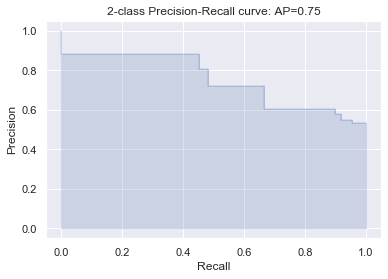

In [223]:
y_score_knc = knc.predict_proba(X_test)[:,-1]
average_precision = average_precision_score(y_test, y_score_knc)

precision, recall, _ = precision_recall_curve(y_test, y_score_knc)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Делаю то же самое с RandomForestClassifier

In [224]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfc = RandomForestClassifier()

param_grid = {
                 'n_estimators': [10, 50, 100, 500],
                 'max_depth': [5, 10, 15, 20]
             }
grid_model_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring = 'f1')
grid_model_rfc.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_model_rfc.best_params_)

Лучшее значение параметра: {'max_depth': 5, 'n_estimators': 10}
CPU times: user 46.5 s, sys: 695 ms, total: 47.1 s
Wall time: 55.5 s


In [225]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=5)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('F1-score: %f'% f1_score(y_test, y_pred))

F1-score: 0.749156


In [226]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       907
           1       0.76      0.74      0.75       453

    accuracy                           0.84      1360
   macro avg       0.82      0.81      0.81      1360
weighted avg       0.83      0.84      0.84      1360



Precision - Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

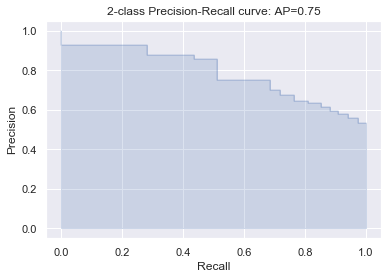

In [227]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
_score_rfc = rfc.predict_proba(X_test)[:,-1]
precision, recall, _ = precision_recall_curve(y_test, y_score_rfc)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

И для LogitBoost

In [228]:
%%time
from logitboost import LogitBoost

lboost = LogitBoost()

param_grid = {
                 'n_estimators': [10, 50, 100, 500],
                 'weight_trim_quantile': [0.05, 0.03, 0.07]
             }
grid_model_lboost = GridSearchCV(lboost, param_grid, cv=10, scoring = 'f1')
grid_model_lboost.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_model_lboost.best_params_)

Лучшее значение параметра: {'n_estimators': 10, 'weight_trim_quantile': 0.05}
CPU times: user 31.3 s, sys: 464 ms, total: 31.8 s
Wall time: 34 s


In [233]:
lboost = LogitBoost(n_estimators=50, weight_trim_quantile=0.05)
lboost.fit(X_train, y_train)
y_lpred = lboost.predict(X_test)
print('F1-score: %f'% f1_score(y_test, y_pred)

SyntaxError: unexpected EOF while parsing (<ipython-input-233-ced49f336a3f>, line 4)

In [230]:
report = classification_report(y_test, lboost.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       907
           1       0.76      0.74      0.75       453

    accuracy                           0.84      1360
   macro avg       0.82      0.81      0.81      1360
weighted avg       0.83      0.84      0.84      1360



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

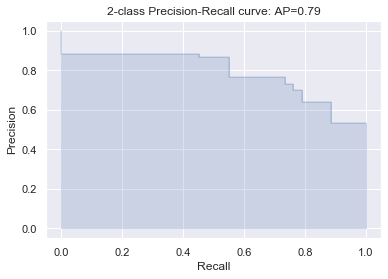

In [231]:
y_score_lboost = lboost.predict_proba(X_test)[:,-1]
average_precision = average_precision_score(y_test, y_score_lboost)

precision, recall, _ = precision_recall_curve(y_test, y_score_lboost)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))